화소처리 - 이미지, 영상화소 / 밝기 변환 / 히스토그램 / 컬러공간
2D : 2차원 데이터 행렬 연산 -> 화소추출 / 값 / 수정 / 새로운 화소를 추가 할 수 있다.

In [6]:
# 8. 화소처리 - 이미지 영상화소를 위한 2D 추출 후 변환
import cv2
import numpy as np

def mysu_res(mysu_r):  # mysu_r = mysu
    for i in range(mysu_r.shape[0]):   # 행 추출
        for j in range(mysu_r.shape[1]):   # 열 추출
            res_value = mysu_r.item(i,j)   # 요소를 접근
            mysu_r.itemset((i,j), res_value * 2)  # 원소의 값을 연산 후 재 대입
    
mysu = np.arange(10).reshape(2,5)  # -> mysud.shape[0]행, mysu.shape[1]열
print("원본데이터 :\n", mysu, mysu.shape[0], mysu.shape[1])

mysu_res(mysu)
print('요소값 변경 후 :\n%s \n'%mysu)

원본데이터 :
 [[0 1 2 3 4]
 [5 6 7 8 9]] 2 5
0
1
2
3
4
5
6
7
8
9
요소값 변경 후 :
[[ 0  2  4  6  8]
 [10 12 14 16 18]] 



In [14]:
# 8-1. 수행 시간을 체크해보자
import cv2
import numpy as np, time

# 이미지를 추출
image = cv2.imread('myImg\\Lenna.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise Exception("파일 오류")
    
# 이미지의 화소를 그대로 읽어서 리턴받는 함수
def img_access01(image):
    img_res = np.zeros(image.shape[:2], image.dtype)
    for i in range(image.shape[0]):   # 행 추출
        for j in range(image.shape[1]):   # 열 추출
            pixel = image[i,j]   # 원본이미지의 화소를 추출해서 pixel에 저장
            img_res[i,j] = 255 - pixel  # 화소를 대입
    return img_res
            
# 이미지의 화소를 item() 방식으로 접근
def img_access02(image):
    img_res = np.zeros(image.shape[:2], image.dtype)
    for i in range(image.shape[0]):   # 행 추출
        for j in range(image.shape[1]):   # 열 추출
            pixel = image.item(i,j)   # 원본이미지의 화소를 추출해서 pixel에 저장
            img_res.itemset((i,j), 255 - pixel)  # 화소를 대입
    return img_res

# 나만의 테이블을 만들어서 연동
def img_access03(image):
    lookup = [255-i for i in range(256)]
    lookup = np.array(lookup, np.uint8)
    res_img = lookup[image]
    return res_img

# opencv
def img_access04(image):
    res_img = cv2.subtract(255,image)
    return res_img

# ndarray
def img_access05(image):
    res_img = 255-image
    return res_img


# 시간을 체크하는 함수
def time_check(func, message):
    start_time = time.perf_counter()
    ret_img = func(image)
    res_time = (time.perf_counter() - start_time) * 1000
    print(message, '수행시간 체크 : %.2f ms' %res_time)
    return ret_img

# 내용을 확인
image01 = time_check(img_access01, "[case 1] image read")
image02 = time_check(img_access02, "[case 2] image item()")
image03 = time_check(img_access03, "[case 3] lookup table")
image04 = time_check(img_access04, "[case 4] opencv")
image05 = time_check(img_access05, "[case 5] ndarray")

cv2.imshow('원본 image', image)
cv2.imshow('직접 접근 image', image01)
cv2.imshow('item()접근 image', image02)
cv2.imshow('lookup', image03)
cv2.imshow('opencv', image04)
cv2.imshow('ndarray', image05)

cv2.waitKey(0)  # 키 이벤트
cv2.destroyAllWindows()  # 객체 소멸

[case 1] image read 수행시간 체크 : 584.58 ms
[case 2] image item() 수행시간 체크 : 47.54 ms
[case 3] lookup table 수행시간 체크 : 0.48 ms
[case 4] opencv 수행시간 체크 : 0.21 ms
[case 5] ndarray 수행시간 체크 : 5.20 ms


In [26]:
# 8-2. 화소값 체크
import numpy as np, cv2

img = np.zeros((50,512), np.uint8)
img02 = np.zeros((50,512), np.uint8)
row, col = img.shape[:2]

# 행열로 최소값 나열 후 확인
for i in range(row):
    for j in range(col):
        img.itemset((i,j), j//2)  # 화소의 점진적 증가값 확인
        img02.itemset((i,j), j//20 * 10)  # 화소의 계단식
        
cv2.imshow('img', img)
cv2.imshow('img02', img02)


cv2.waitKey(0)  # 키 이벤트
cv2.destroyAllWindows()  # 객체 소멸

In [30]:
# 8-2. 화소값 체크
import numpy as np, cv2

img = cv2.imread('myImg\\Lenna.png', cv2.IMREAD_GRAYSCALE)

#opencv 함수를 이용해서 영상을 밝게
res_img = cv2.add(img, 100)

#opencv 함수를 이용해서 영상을 어둡게
res_img02 = cv2.subtract(img, 100)

# numpy 연산
res_img03 = img+100  # 250 + 100 = 350 % 256 -> 104 : module 방식
res_img04 = img-100

cv2.imshow('res_img', res_img)
cv2.imshow('res_img02', res_img02)
cv2.imshow('res_img03', res_img03)
cv2.imshow('res_img04', res_img04)

cv2.waitKey(0)  # 키 이벤트
cv2.destroyAllWindows()  # 객체 소멸

* 흑백으로 가져와야하는이유
RGB -> 흑백 -> 휘도 신호, BT.601 YUN
y = 0.299*R + 0.587*G + 0.144*B -> BT.601 공식


cv2.cvtColor() / cv2.COLOR_BGR2GRAY / cv2.COLOR_RGB2GRAY(cv2 이외의 라이브러리는 RGB 이거 사용)
cv2.imread(IMG, cv2.IMREAD_GRAYSCALE) -> opencv에서 처리한 변환 처리가 아닌 코덱(플랫폼에 일관x)
cv2.cvtColor() -> opencv에서 변환처리 하겠다(플랫폼에 일관)

9. 명암대비
cv2.scaleAdd(src1, alpha, src2[, dst]) -> dst : 영상대비로 이미지 조절
cv2.addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]) -> dst : 명암 조절

In [42]:
import numpy as np, cv2

img = cv2.imread('myImg\\Lenna.png', cv2.IMREAD_GRAYSCALE)

n_img = np.zeros(img.shape[:2], img.dtype)  # 더미 이미지 생성
r_img = cv2.scaleAdd(img, 0.2, n_img)  # 영상대비 감소
r_img02 = cv2.scaleAdd(img, 2.0, n_img)  # 영상대비 증가

# 영상화소 평균값의 절반정도 계산
m_res = cv2.mean(img)[0]/2.0

r_img03 = cv2.addWeighted(img, 0.5, n_img, 0, m_res)
r_img04 = cv2.addWeighted(img, 2.0, n_img, 0, m_res)

cv2.imshow('img', img)
cv2.imshow('r_img', r_img)
cv2.imshow('r_img02', r_img02)
cv2.imshow('r_img03', r_img03)
cv2.imshow('r_img04', r_img04)

cv2.waitKey(0)  # 키 이벤트
cv2.destroyAllWindows()  # 객체 소멸

9. 히스토그램을 사용해보자(계산, opencv함수, 스트레칭, 평활화)
cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
channels : 히스토그램에 사용할 수 있는 차원목록
mask : 특정영역만 계산 하기 위한 행렬 - images와 같은 크기의 8bit 배열
histSize : 히스토그램 배열의 크기
ranges : 범위
hist : 히스트
accumulate : 누적플래그값(여러배열의 단일 히스토그램 값을 리턴 할 때 사용)


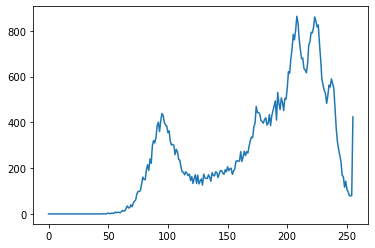

In [47]:
# 9. 히스토그램을 사용해보자(계산, opencv함수, 스트레칭, 평활화)
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('myImg\\Lenna.png')
res = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 흑백 : 0 / 컬러 : channels=[0] 블루, channels=[1] 그린, channels=[2] 레드
# mask = None 이면 전체영역을 다 가져온다
hist_values = cv2.calcHist([res], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist_values.shape

plt.plot(hist_values)

Text(0.5, 1.0, 'my_img')

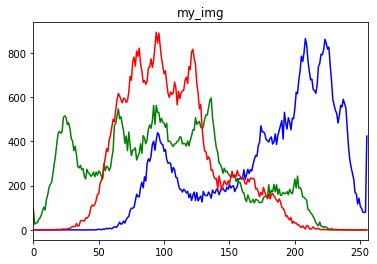

In [48]:
# 9-2 이미지 : 영상의 3색을 계산해서 그래프로 확인
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('myImg\\Lenna.png')
res = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
color = ('b', 'g', 'r')

for i, col in enumerate(color):
    hist_value = cv2.calcHist([res],[i],None,[256],[0,256])
    plt.plot(hist_value, color = col)
    plt.xlim([0,256])

plt.title('my_img')

이미지크기 :  (881, 1757, 3)


Text(0.5, 1.0, 'my_img')

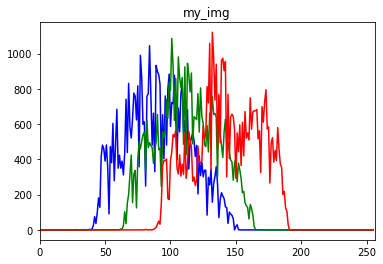

In [17]:
# 9-3 이미지 : 영상의 3색을 계산해서 mask그래프로 확인
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('myImg\\road1.png')
print('이미지크기 : ',img.shape)
res = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
color = ('b', 'g', 'r')

mask = np.zeros(img.shape[:2],np.uint8)  # 검정
mask[300:400, 100:600] = 255   # 흰색

# 마스크도 확인하자
# plt.imshow(mask, cmap = 'gray')

# 히스토그램 확인
for i, col in enumerate(color):
    hist_value = cv2.calcHist([res],[i],mask,[256],[0,256])
    plt.plot(hist_value, color = col)
    plt.xlim([0,256])

plt.title('my_img')

이미지크기 :  (881, 1757, 3)


Text(0.5, 1.0, 'my_img')

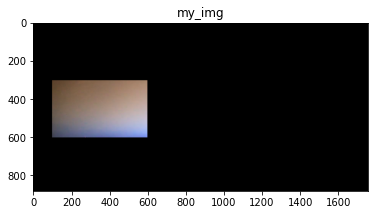

In [15]:
# 9-3 이미지 : 이미지, 마스크랑 결합해보자
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('myImg\\road1.png')
print('이미지크기 : ',img.shape)
res = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = np.zeros(img.shape[:2], np.uint8)  # 검정
mask[300:600, 100:600] = 255   # 흰색

# 마스크도 확인하자
plt.imshow(mask, cmap = 'gray')

# 기존의 이미지랑 마스크 이미지랑 병합
mask_img = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(mask_img)


plt.title('my_img')

이미지크기 :  (881, 1757, 3)


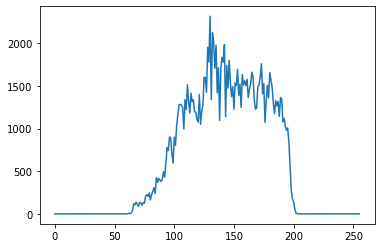

In [20]:
# 9-4 이미지 : 이미지, 마스크랑 결합해보자
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('myImg\\road1.png')
print('이미지크기 : ',img.shape)
res = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = np.zeros(img.shape[:2], np.uint8)  # 검정
mask[300:600, 100:600] = 255   # 흰색

# 마스크도 확인하자
# plt.imshow(mask, cmap = 'gray')

# 마스크가 된 히스토그램을 만들어보자
hist_values_red = cv2.calcHist([res], channels=[2], mask=mask, histSize=[256], ranges=[0,256])
hist_values_all = cv2.calcHist([res], channels=[2], mask=None, histSize=[256], ranges=[0,256])

plt.plot(hist_values_red)

# 기존의 이미지랑 마스크 이미지랑 병합
# mask_img = cv2.bitwise_and(img, img, mask=mask)
# plt.imshow(mask_img)

# plt.title('my_img')

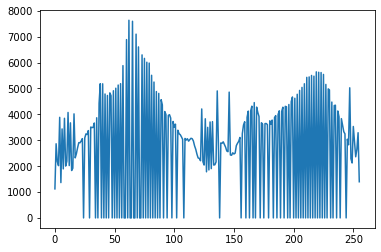

In [44]:
# 9-5 히스토그램 평탄화 : 화소값이 특정부분에 편중화되어있을 경우 골고루 색감을 평탄하게 이미지를 조정한다.
# 이미지, 마스크랑 결합해보자
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('myImg\\cream.jpg',0)
# img = cv2.imread('myImg\\cream_gaeul.jpg', 0)

def img_view(img, cmap=None):
    fig = plt.figure(figsize = (10,8))  # plt의 영역(영역사이즈)
    ax = fig.add_subplot(111)  # 1*1의 영역 중 1번째 위치에 좌표평면에 그려라(ax*1)
    ax.imshow(img, cmap)
    
# img_view(img, cmap='gray')

hist_values_all = cv2.calcHist([img], channels=[0], mask=None, histSize=[256], ranges=[0,256])
# plt.plot(hist_values_all)

hist_eq = cv2.calcHist([eq_img], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_eq)

# cv2.equalizeHist(src[, dst])  평탄화
eq_img = cv2.equalizeHist(img)  # 명암의 차이가 난 것을 확인
# img_view(eq_img, cmap='gray')

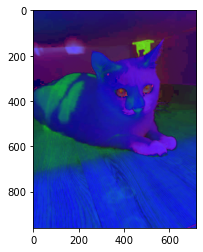

In [8]:
# 9-6. 색상(Hue), 채도(Saturation), 명도(Value) 확인  : 원통
# 색상(Hue), 채도(Saturation), 명도(Lightness) 확인  opencv에서는 hls라고 부른다
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('myImg\\cream.jpg')  # 원본이미지는 RGB인데 opencv는 BGR이라 색이 다르게 나옴
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 이미지 호출 후 BGR -> RGB 확인
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)  # BGR -> HLS로 변환
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # BGR -> HSV로 변환
plt.imshow(img_hsv)

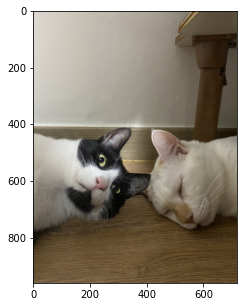

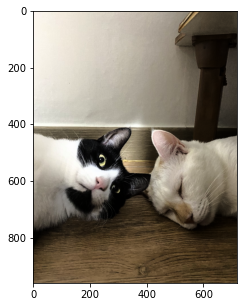

In [23]:
# 9-7. 컬러이미지 히스토그램 : 색상(Hue), 채도(Saturation), 명도(Value) 확인
import cv2
import numpy as np
import matplotlib.pyplot as plt

def img_view(img, cmap=None):
    fig = plt.figure(figsize = (10,5))  # plt의 영역(영역사이즈)
    ax = fig.add_subplot(111)  # 1*1의 영역 중 1번째 위치에 좌표평면에 그려라(ax*1)
    ax.imshow(img, cmap)

img = cv2.imread('myImg\\cream_gaeul.jpg')  # 원본이미지는 RGB인데 opencv는 BGR이라 색이 다르게 나옴
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 이미지 호출 후 BGR -> RGB 확인
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)  # BGR -> HLS로 변환
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # BGR -> HSV로 변환
img_view(img_rgb)

img_hsv[:,:,2] = cv2.equalizeHist(img_hsv[:,:,2]) # 0:색상, 1:채도, 2:밝기
eq_img_hsv = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
img_view(eq_img_hsv)

In [38]:
# 트랙바를 사용해서 컬러 공간 변환
import cv2
import numpy as np
import matplotlib.pyplot as plt

def onChange(value):
    tb[0] = cv2.getTrackbarPos('my_trackbar', 'result')
    tb[1] = cv2.getTrackbarPos('my_trackbar02', 'result')
    
    my_a, res = cv2.threshold(result, tb[1], 255, cv2.THRESH_TOZERO_INV)
    
    cv2.threshold(res, tb[0],255,cv2.THRESH_BINARY,res)
    cv2.imshow("result", res)

img_bgr = cv2.imread('myImg\\Lenna.png', cv2.IMREAD_COLOR)  # 원본이미지는 RGB인데 opencv는 BGR이라 색이 다르게 나옴
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)  # BGR -> HSV로 변환 (컬러공간을 변환)

result = np.copy(img_hsv[:,:,0])  #  채널의 색상을 복사 / 0:색상, 1:채도, 2:밝기

tb=[50,50]  # 트랙바로 선택할 변수 범위
cv2.namedWindow('result')

cv2.createTrackbar('my_trackbar', 'result', tb[0], 255, onChange)
cv2.createTrackbar('my_trackbar02', 'result', tb[1], 255, onChange)

onChange(tb[0])  # 2진화 작업
cv2.imshow('img_bgr', img_bgr)

cv2.waitKey(0)  # 키 이벤트
cv2.destroyAllWindows()  # 객체 소멸

1. 디지털 영상은 화소들로 구성. 화소 0-255 값을 가진다. 0(검정) - 255(흰색)

2. 화소값은 회색의 비율정도로 표현된다 -> 그레이스케일 영상

3. 행렬의 모든요소에 스칼라 값을 + : 영상을 밝게 한다. - : 영상을 어둡게 한다. * : 영상의 대비조절을 한다.

4. 히스토그램은 영상의 어떤 데이터가 얼마나 많은지 빈도수 도수분포표 (가로축(계층,계급), 세로축(도수, 빈도수)

5. 히스토그램을 계산하는 함수 : cv2.calcHist() : 함수는 매개인수로 입력이미지 또는 영상의 행렬, 입력영상채널, 마스크행렬, 출력결과행렬, 결과행렬의 차원수, 계급크기, 각 채절범위 등으로 구성된다.

6. histogram stretching : 히스토그램의 분포가 한쪽으로 치우쳐 분포가 좁아진 영상의 대비가 좋지 않은 영상을 개선하는 알고리즘

7. histogram equalization : 특정 부분에서 한쪽으로 치우친 명암분포를 가진 영상을 히스토그램의 재분배과정을 거쳐서 균등하게 만들어 주는 알고리즘

8. 컬러 공간이란 색 표시계의 모든 색들을 색 공간에서 3차원 좌표로 표현한 것을 말한다.

9. RGB : 모니터에서 주로 사용, CMY : 프린터에서 사용, HSI : 인간의 시각시스템과 유사한 알고리즘, YCbCr : JPEG 등의 압축영상에 사용, YUV : 방송시스템에 사용, XYZ, La*b* -> 컬러공간
    cv2.cvtColor() 컬러공간 변환

<<회선정리>>
1. 회선은 마스크내의 원소값과 공간 영역에 있는 입력 영상의 화소값들을 대응되게 곱하고 출력 화소값을 계산하는 것
    이때 입력 영상에 곱해지는 마스크를 커널, 윈도우, 필터라고 부른다
    
2. bluring은 부드러운 영상, 흐려지는 결과 -> 마스크의 원소를 모두 같은 값으로 지정해서 수정, 전체 합이 1이 되어야 한다.

3. sharpening은 출력화소 두드러지게 나타나면서 선명하고 날카로운 영상 -> 회선 마스크에서 중심계수와 주변계수의 차이를 크게 만든다. 전체합이 1이 되어야하고, 중기계수는 큰값, 주변계수는 음수값을 갖게한다.

4. edges(에지) : 화소값이 급격하게 변화되는 부분 [크기, 위치, 모양]을 값으로 방향을 탐지한다.

5. 에지는 이웃하는 두 화소의 차분으로 구할 수 있으며, 미분 공식과 유사하다. 미분마스크로 회선을 수행하면서 에지를 리턴받을 수 있다. 1차 미분 마스크(소벨(sobel), 프리윗(prewitt), 로버츠(roberts))

6. 2차 미분 에지 : 라플라시아(Laplacian), LoG(Laplacian of Gaussian), DoG(Difference of Gaussian)

7. 캐니(Canny) 에지 검출 : 블러링을 통해서 노이즈를 제거 -> 화소 기울기로 각도와 방향을 소벨로 검출 -> 최대값으로 제어 -> 임계값 에지 결정

8. 비선형 공간필터링 : 최솟값, 최댓값, 평균값, 중간값 등의 필터링
    - 최솟값, 최댓값 : 마스크 범위에서 출력화소로 결정한다. 최솟값 필터링은 영상이 어두워지고, 최댓값은 영상이 밝아진다.
    - 평균값(입력화소) : 마스크 범위의 입력화소들을 평균해서 출력 화소를 결정 / 블러링 같은 효과가 난다.
    - 중간값 : 마스크 범위의 입력화소들을 정렬 후 중간값을 출력 화소로 결정(임펄스작업들의 잡음제거 등을 할 경우 마스크 범위내에서 가장 큰 값, 혹은 가장 작은값이 되기 때문에 출력 화소에서 배재되어 중간값을 사용하게 된다)
   
9. 가우시안 블러링은 정규분포 곡선을 갖는 마스크를 가우시안 수식에 따라 생성하고 생성한 결과를 마스크로 회선을 수행한다. 정규분포 마스크는 평균과 표준편차로 생성하기 때문에 표준편차가 클수록 영상이 흐려져 생성된다

10. 모폴리지(열림연산, 닫힘연산)는 형태학적 방법을 영상으로 처리하는 것이며 침식과 팽창연산을 한다.
    - 침식 : 객체의 크기가 축소하는 것을 말하며 영상내에서 작은 크기의 잡음제거할때 사용
    - 팽창 : 객체의 크기가 확대되면서 빈공간을 채울 때 사용
    - 열림연산 : 침식연산 후에 팽창을 수행한다. 침식은 객체가 축소되고 배경의 잡음들은 제거되며, 팽창연산으로 축소되었던 객체들이 원래 크기로 돌아간다.
    - 닫힘연산 : 팽창연산 후에 침식연산을 수행한다. 팽창연산으로 객체가 확장되어 객체내부의 빈 공간이 매워진 후 침식연산으로 확장되었던 객체의 크기를 원래대로 축소한다.